# 정규성 확인
* 시각화 방법 : 히스토그램, kernel density plot, qq plot
* 정규성 검정 : 콜모고로프-스미노로프 검정, 샤피로-윌크 검정
    * H_0 : 해당 자료는 정규분포를 따른다.
    * 소표본 : 샤피로-윌크 검정
    * 대표본 : 콜모고로프-스미노로프 검정

## 시각화 방법

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
# 데이터 준비
iris = sns.load_dataset('iris')

### histogram

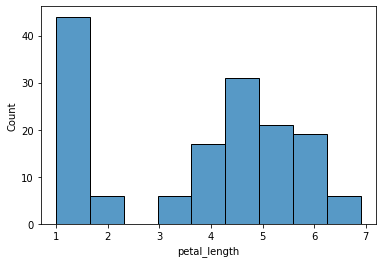

In [31]:
sns.histplot(iris['petal_length']); plt.show()

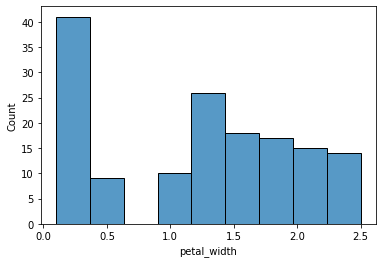

In [32]:
sns.histplot(iris['petal_width']); plt.show()

### kernal distribution

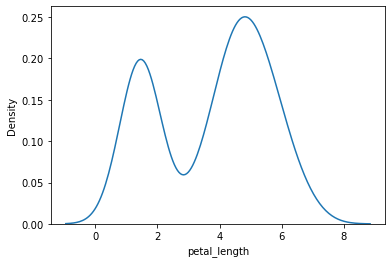

In [30]:
sns.kdeplot(iris['petal_length']); plt.show()

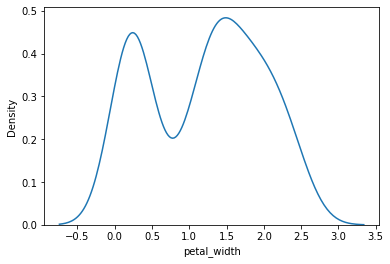

In [29]:
sns.kdeplot(iris['petal_width']); plt.show()

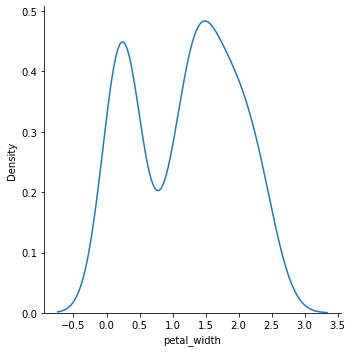

In [28]:
sns.displot(iris['petal_width'], kind='kde'); plt.show()

### qq plot

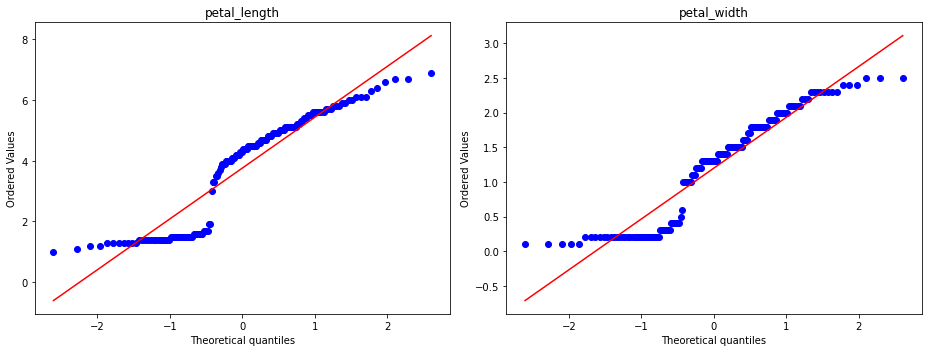

In [39]:
# qq plot
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
stats.probplot(iris['petal_length'], plot=plt)
plt.title("petal_length")

plt.subplot(1, 2, 2)
stats.probplot(iris['petal_width'], plot=plt)
plt.title("petal_width")

plt.tight_layout()
plt.show()

## 정규성 검정

### Shapiro-wilk

In [70]:
# 결과 요약용 함수
def show_result(teststat, pvalue, title):
    print(f"<test result of {title}>")
    print(f"p-value = {pvalue}")
    print(f"test stat = {teststat}")
    if pvalue < 0.05: print("H0 기각. 정규분포가 아님.")
    else: print("H0 기각 실패. 정규분포라고 볼 수 있음.")

In [73]:
teststat, pvalue = stats.shapiro(iris['petal_length'])
show_result(teststat, pvalue, 'petal_length')

<test result of petal_length>
p-value = 7.41295913542217e-10
test stat = 0.8762689232826233
H0 기각. 정규분포가 아님.


### kolmogorov smirnov

In [74]:
teststat, pvalue = list(stats.kstest(iris['petal_length'], 'norm'))
show_result(teststat, pvalue, 'petal_length')

<test result of petal_length>
p-value = 1.4044248603466367e-136
test stat = 0.8765328487477231
H0 기각. 정규분포가 아님.


# 상관분석 : 비모수적

## 스피어만 상관계수

In [75]:
stats.spearmanr(iris['petal_length'], iris['petal_width'])

SpearmanrResult(correlation=0.9376668235763412, pvalue=8.156596854126675e-70)

## 켄달타우 상관계수

In [76]:
stats.kendalltau(iris['petal_length'], iris['petal_width'])

KendalltauResult(correlation=0.8068906859884751, pvalue=2.4434463945332473e-44)

# 평균분석
* 비교집단의 수와 집단 간 독립적인지의 여부에 따라 통계방법이 달라짐
* 집단의 수가 2개 vs 3개 이상이냐로 구분
* 종속변수의 형태에 따라 모수 / 비모수로 구분
* 표본의 대응관계에 따라 선택

## 실습 : 성인 스마트폰 이용시간

In [81]:
# 자료 불러오기
a1 = pd.read_excel("../data/성인_스마트폰_이용시간_남자.xlsx")
a2 = pd.read_excel("../data/성인_스마트폰_이용시간_여자.xlsx")

In [86]:
print(a1.head())
print(a1.tail())

   male
0  33.6
1  31.3
2  36.2
3  27.6
4  32.1
    male
95  32.3
96  28.6
97  28.9
98  35.2
99  30.5


In [87]:
print(a2.head())
print(a2.tail())

   female
0    34.9
1    35.1
2    30.9
3    30.5
4    31.8
    female
93    28.8
94    33.6
95    32.5
96    33.1
97    35.2


In [92]:
print(a1.describe().transpose(), '\n\n', a2.describe().transpose())

      count    mean       std   min   25%   50%     75%   max
male  100.0  31.273  2.912767  22.2  29.3  31.1  32.975  38.9 

         count       mean       std   min   25%    50%   75%   max
female   98.0  32.876531  3.269282  24.4  30.9  32.75  34.9  41.7


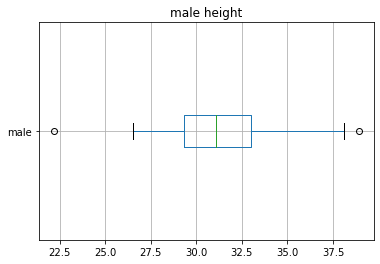

In [108]:
a1.boxplot(column = 'male', vert = False)
plt.title("male height")
plt.show()

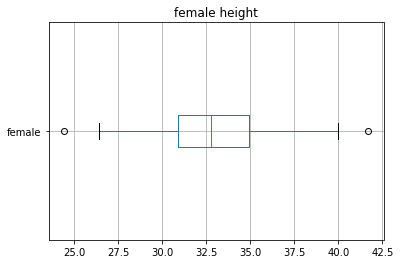

In [107]:
a2.boxplot(column = 'female', vert = False)
plt.title("female height")
plt.show()

In [114]:
# 샤피로 검정을 통한 정규성 검정
# H0 : 정규분포이다.
print(f"pvalue of a1 : {stats.shapiro(a1).pvalue}")
print(f"pvalue of a2 : {stats.shapiro(a2).pvalue}")

# H0 기각 실패. 따라서 정규분포라고 볼 수 있음.
# CLT를 적용해서 정규분포라고 봐도 됨.

pvalue of a1 : 0.2575761079788208
pvalue of a2 : 0.7467511296272278


In [117]:
# 등분산성 검정
# H0 : 등분산이다.

test_stat, p_val = stats.levene(a1.male, a2.female, center='mean')
print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각하지 않음. 등분산성 만족

test_stat : 0.47175507324600746
p_value : 0.4929926832749576


In [124]:
# 등분산성 가정 시 검정
# H0 : 남성과 여성의 평균이 같다.
test_stat, p_val = stats.ttest_ind(a1.male, a2.female, alternative = 'two-sided')

print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각. 평균에 차이가 난다.

test_stat : -3.645768621069706
p_value : 0.00034151561881195196


In [125]:
# 이분산성 가정 시 검정 (웰치의 t-검정)
# H0 : 남성과 여성의 평균이 같다.
test_stat, p_val = stats.ttest_ind(a1.male, a2.female, equal_var=False, alternative='two-sided')

print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각. 평균에 차이가 난다.

test_stat : -3.641516097173129
p_value : 0.0003483403525947437


In [127]:
# 독립인 두 표본, 비모수적 방법
# H0 : 남성과 여성의 평균이 같다.
test_stat, p_val = stats.mannwhitneyu(a1.male, a2.female)

print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각. 평균에 차이가 난다.

test_stat : 3415.0
p_value : 0.00023070457319020855


## 실습 : 피트니스 데이터 (대응표본)

In [130]:
data = pd.read_excel("../data/피트니스_결과.xlsx")
data.describe()

,sex,before,after
count,13.000000,13.000000,13.000000
mean,1.538462,41.384615,40.076923
std,0.518875,9.587652,9.886536
min,1.000000,32.000000,29.000000
25%,1.000000,34.000000,33.000000
50%,2.000000,38.000000,37.000000
75%,2.000000,46.000000,45.000000
max,2.000000,60.000000,58.000000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     13 non-null     int64
 1   before  13 non-null     int64
 2   after   13 non-null     int64
dtypes: int64(3)
memory usage: 440.0 bytes


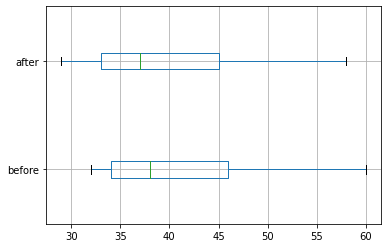

In [137]:
data.boxplot(column=['before', 'after'], vert=False)
plt.show()

In [138]:
# 샤피로 검정을 통한 정규성 검정
# H0 : 정규분포이다.
print(f"pvalue of data['before'] : {stats.shapiro(data['before']).pvalue}")
print(f"pvalue of data['after'] : {stats.shapiro(data['after']).pvalue}")

# H0 기각. 정규분포가 아님.

pvalue of data['before'] : 0.03209731727838516
pvalue of data['after'] : 0.05772557854652405


In [144]:
# 평균 차이 검정 : paired T-test (모수적 방식)
# H0 : 전후 차이가 없다.
test_stat, p_val = stats.ttest_rel(data.before, data.after, alternative = 'greater')
print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각. 전후 차이가 있다.

test_stat : 6.27766603994597
p_value : 2.0408468189827468e-05


In [147]:
# 평균 차이 검정 : 윌콕슨 (비모수적 방식)
# H0 : 전후 차이가 없다.
test_stat, p_val = stats.wilcoxon(data.before, data.after, alternative='greater')
print(f"test_stat : {test_stat}")
print(f"p_value : {p_val}")

# H0 기각. 전후 차이가 있다.

test_stat : 78.0
p_value : 0.0007660506977098094


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
